# Acceptance map that "ruins" GENIE samples to mimic the detector

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/'

In [3]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [4]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'; print_line()

_,OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

38163 pairs from On-Beam, 24323 in Fiducial Volume
--------------------------------------------------------------
283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%


## re-scaling of the cosmic in the overlay, and application of the cuts

In [5]:
cuts_order  = ['no cut','Chi2Proton','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']
overlay_scalings = dict()
f_Cosmic=0.8658
overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)), f_Cosmic=f_Cosmic, OverlaySubsamples=OverlaySamples)
print 'overlay scalings';pp.pprint(overlay_scalings)
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order
                                                                   ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic])
print 'applied cuts to overlay'
reducedOnBeam,BeamOnNumbers = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'applied cuts to data'

overlay scalings
{   'N(On) scaling and f(cosmic)=0.866': {   '1mu-1p': 0.03578088045074869,
                                             'CC 1p 0pi': 0.03578088045074869,
                                             'N(Ovelay)/N(On)': 7.667022982362373,
                                             'cosmic': 0.22106943595880704,
                                             'other pairs': 0.03578088045074868}}
applied cuts to overlay
applied cuts to data


In [6]:
overlay_scaling = overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]

In [7]:
selected_events = reducedOnBeam['Pt & delta phi']
print len(selected_events),'selected pairs in data'
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type] = reducedOverlay['Pt & delta phi'][pair_type]
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC1p0π pairs in overlay'

350 selected pairs in data
7304 selected CC1p0π pairs in overlay


In [8]:
# tight FV
max_FV_y = 104 
min_FV_z,max_FV_z = 5,1020
min_FV_x,max_FV_x = 5,240

selected_overlay_tightFV=dict()
for pair_type in pair_types:
    selected_overlay_tightFV[pair_type] = sample_in_FV(selected_overlay[pair_type]
                                                       ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
overlay_tightFV = pd.concat([selected_overlay_tightFV['1mu-1p'],selected_overlay_tightFV['cosmic'],selected_overlay_tightFV['other pairs']])
print len(selected_overlay_tightFV),'selected overlay in tight FV'
selected_CC1p0pi_tightFV = sample_in_FV(sample=selected_CC1p0pi
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_CC1p0pi_tightFV),'selected CC1p0π in overlay in tight FV'
selected_events_tightFV = sample_in_FV(sample=selected_events
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_events_tightFV),'selected pairs in data in tight FV'

4 selected overlay in tight FV
4064 selected CC1p0π in overlay in tight FV
182 selected pairs in data in tight FV


In [10]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/2018_05_11/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_05_11_genie.csv')
print len(GENIEall),' GENIE interaction'
GENIE_CC1p0pi = GENIEall[(GENIEall['IsCC_1p_200MeVc_0pi']==True)]
print len(GENIE_CC1p0pi),'GENIE CC1p0π events'

926088  GENIE interaction
243732 GENIE CC1p0π events


In [11]:
GENIE_CC1p0pi['truth_Pmu_cos_theta'] = np.cos(GENIE_CC1p0pi['truth_Pmu_theta'])
selected_CC1p0pi_tightFV['truth_Pmu_cos_theta'] = np.cos(selected_CC1p0pi_tightFV['truth_Pmu_theta'])
overlay_tightFV['truth_Pmu_cos_theta'] = np.cos(overlay_tightFV['truth_Pmu_theta'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
def theta_rad_label(theta):
    if theta==0: return "0"
    if np.abs(theta-np.pi)<0.001: return "$\pi$"
    for n in range(2,10): 
        if np.abs(theta-(np.pi/n))<0.001: 
            return "$\pi/%d$"%n
    return "$%.1f\pi$"%(theta/np.pi)

# What is the acceptance as a function of $p_p$ and $\theta_p$ in different bins of $p_\mu$ and $\theta_\mu$

In [18]:
large_bins_Pmu_min = np.array([0,0.45])
large_bins_Pmu_max = np.array([large_bins_Pmu_min[1],2])
large_bins_Pmu_centers = 0.5*(large_bins_Pmu_min+large_bins_Pmu_max)
large_bins_Pmu_theta_min = np.array([0,0.3*np.pi])
large_bins_Pmu_theta_max = np.array([large_bins_Pmu_theta_min[1],np.pi])
large_bins_Pmu_theta_centers = 0.5*(large_bins_Pmu_theta_min+large_bins_Pmu_theta_max)

hcc1p0pi_muon_bins = np.zeros((2,2))

# proton acceptance parameters
Pp_bins = linspace(0,1.4,6)
Pp_theta_bins = linspace(0,np.pi,6)
Pp_xcenters,Pp_theta_ycenters = 0.5*(Pp_bins[1:]+Pp_bins[:-1]),0.5*(Pp_theta_bins[1:]+Pp_theta_bins[:-1])
nx_p,ny_p = len(Pp_bins)-1,len(Pp_theta_bins)-1


In [19]:
def sample_in_xy_bin(sample,xmin,xmax,ymin,ymax,xvar,yvar):
    return sample[(sample[xvar]>xmin)&(sample[xvar]<xmax)&(sample[yvar]>ymin)&(sample[yvar]<ymax)]
def sample_in_muon_bin(sample,Pmu_min,Pmu_max,Pmu_theta_min,Pmu_theta_max):
    return sample_in_xy_bin(sample,Pmu_min,Pmu_max,Pmu_theta_min,Pmu_theta_max,xvar='truth_Pmu',yvar='truth_Pmu_theta')
def sample_in_proton_bin(sample,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max):
    return sample_in_xy_bin(sample,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max,xvar='truth_Pp',yvar='truth_Pp_theta')

In [20]:
h_p_acc,h_p_err,h_p_err_rel = dict(),dict(),dict()
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_theta,(Pmu_theta_min,Pmu_theta_max) in enumerate(zip(large_bins_Pmu_theta_min,large_bins_Pmu_theta_max)):
        print 'len(selected_CC1p0pi_tightFV):',len(selected_CC1p0pi_tightFV)
        selected_cc1p0pi_muon_bin = sample_in_muon_bin(selected_CC1p0pi_tightFV,Pmu_min,Pmu_max,Pmu_theta_min,Pmu_theta_max)
        generated_muon_bin = sample_in_muon_bin(GENIE_CC1p0pi,Pmu_min,Pmu_max,Pmu_theta_min,Pmu_theta_max)        
        overlay_muon_bin = sample_in_muon_bin(overlay_tightFV,Pmu_min,Pmu_max,Pmu_theta_min,Pmu_theta_max)        

        hcc1p0pi_muon_bins[iPmu][iPmu_theta] = len(selected_cc1p0pi_muon_bin)
        print 'hcc1p0pi_muon_bins[iPmu][iPmu_theta]:',hcc1p0pi_muon_bins[iPmu][iPmu_theta]
        
        # now check the proton acceptance in this muon-kinematics bin
        hgen,hacc,heff,heff_err = np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p))
        hall,hcc1p0pi,hpur,hpur_err = np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p))
        hacc,herr,herr_rel = np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p))


        for iPp in range(nx_p):
            Pp_min,Pp_max = Pp_bins[iPp],Pp_bins[iPp+1]    
            for iPp_theta in range(ny_p):
                Pp_theta_min,Pp_theta_max = Pp_theta_bins[iPp_theta],Pp_theta_bins[iPp_theta+1]        

                # efficiency
                gen_proton_bin = sample_in_proton_bin(generated_muon_bin,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max)            
                acc_proton_bin = sample_in_proton_bin(selected_cc1p0pi_muon_bin,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max)

                hgen[iPp][iPp_theta] = len(gen_proton_bin)        
                hacc[iPp][iPp_theta] = len(acc_proton_bin)        
                heff[iPp][iPp_theta] = float(hacc[iPp][iPp_theta])/(hgen[iPp][iPp_theta] if hgen[iPp][iPp_theta]>0 else 1)
                heff_err[iPp][iPp_theta] = heff[iPp][iPp_theta]*np.sqrt( (1./hgen[iPp][iPp_theta] if hgen[iPp][iPp_theta] else 0)                                                    
                                                                + (1./hacc[iPp][iPp_theta] if hacc[iPp][iPp_theta] else 0) )

                # purity 
                overlay_proton_bin = sample_in_proton_bin(overlay_muon_bin,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max)            
                cc1p0pi_proton_bin = sample_in_proton_bin(selected_cc1p0pi_muon_bin,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max)

                hall[iPp][iPp_theta] = len(overlay_proton_bin)        
                hcc1p0pi[iPp][iPp_theta] = len(cc1p0pi_proton_bin)          
                hpur[iPp][iPp_theta] = float(hcc1p0pi[iPp][iPp_theta])/(hall[iPp][iPp_theta] if hall[iPp][iPp_theta]>0 else 1)                
                hpur_err[iPp][iPp_theta] = hpur[iPp][iPp_theta]*np.sqrt( (1./hall[iPp][iPp_theta] if hall[iPp][iPp_theta] else 0)                                                
                                                                        + (1./hcc1p0pi[iPp][iPp_theta] if hcc1p0pi[iPp][iPp_theta] else 0) )

                # acceptance 
                hacc[iPp][iPp_theta] = heff[iPp][iPp_theta]/(hpur[iPp][iPp_theta] if hpur[iPp][iPp_theta]>0 else 1)
                herr[iPp][iPp_theta] = hacc[iPp][iPp_theta]*np.sqrt( np.square(heff_err[iPp][iPp_theta]/heff[iPp][iPp_theta] if heff[iPp][iPp_theta] else 0) 
                                                    + np.square(hpur_err[iPp][iPp_theta]/hpur[iPp][iPp_theta] if hpur[iPp][iPp_theta] else 0) )
                herr_rel[iPp][iPp_theta] = herr[iPp][iPp_theta]/hacc[iPp][iPp_theta] if hacc[iPp][iPp_theta]>0 else 0

        h_p_acc['iPmu %d iPmu_theta %d'%(iPmu,iPmu_theta)] = hacc.T
        h_p_err['iPmu %d iPmu_theta %d'%(iPmu,iPmu_theta)] = herr.T
        h_p_err_rel['iPmu %d iPmu_theta %d'%(iPmu,iPmu_theta)] = herr_rel.T
print 'done.'

len(selected_CC1p0pi_tightFV): 4064
hcc1p0pi_muon_bins[iPmu][iPmu_theta]: 440.0
len(selected_CC1p0pi_tightFV): 4064
hcc1p0pi_muon_bins[iPmu][iPmu_theta]: 1543.0
len(selected_CC1p0pi_tightFV): 4064
hcc1p0pi_muon_bins[iPmu][iPmu_theta]: 1651.0
len(selected_CC1p0pi_tightFV): 4064
hcc1p0pi_muon_bins[iPmu][iPmu_theta]: 422.0
done.


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/Pmu_theta_large_bins.pdf


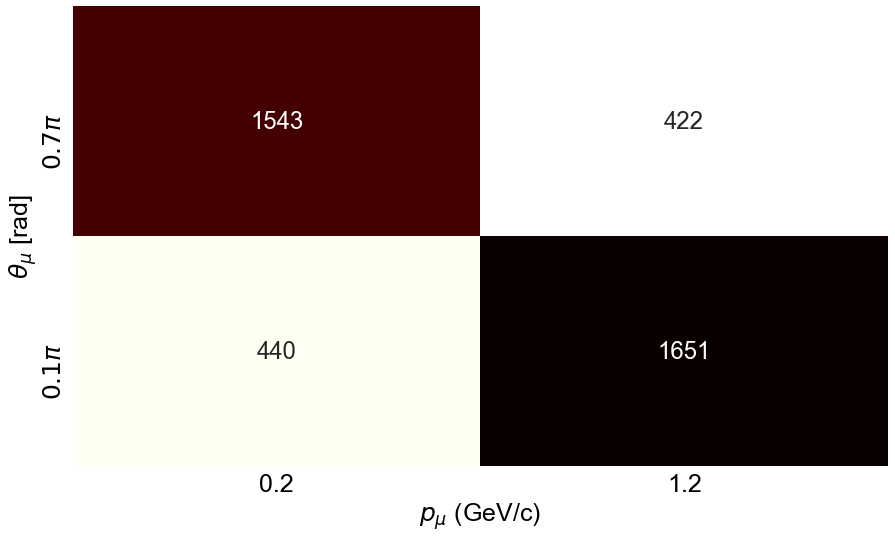

In [26]:
fig = plt.figure(figsize=(12.944,8))
ax = fig.add_subplot(1,1,1)
sns.set(font_scale=2);
sns.heatmap(hcc1p0pi_muon_bins.T.astype(np.int),annot=True,cmap='hot_r',fmt="d"         
            ,xticklabels=["%.1f"%tick for tick in large_bins_Pmu_centers]
            ,yticklabels=["$%.1f\pi$"%(tick/np.pi) for tick in large_bins_Pmu_theta_centers]
            ,cbar=False)
set_axes(ax,r'$p_\mu$ (GeV/c)',r'$\theta_\mu$ [rad]')
ax.invert_yaxis()
plt.tight_layout()
save_figure(figures_path+'Pmu_theta_large_bins.pdf')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less_equal


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/Pp_acceptance_in_large_Pmu_bins.pdf


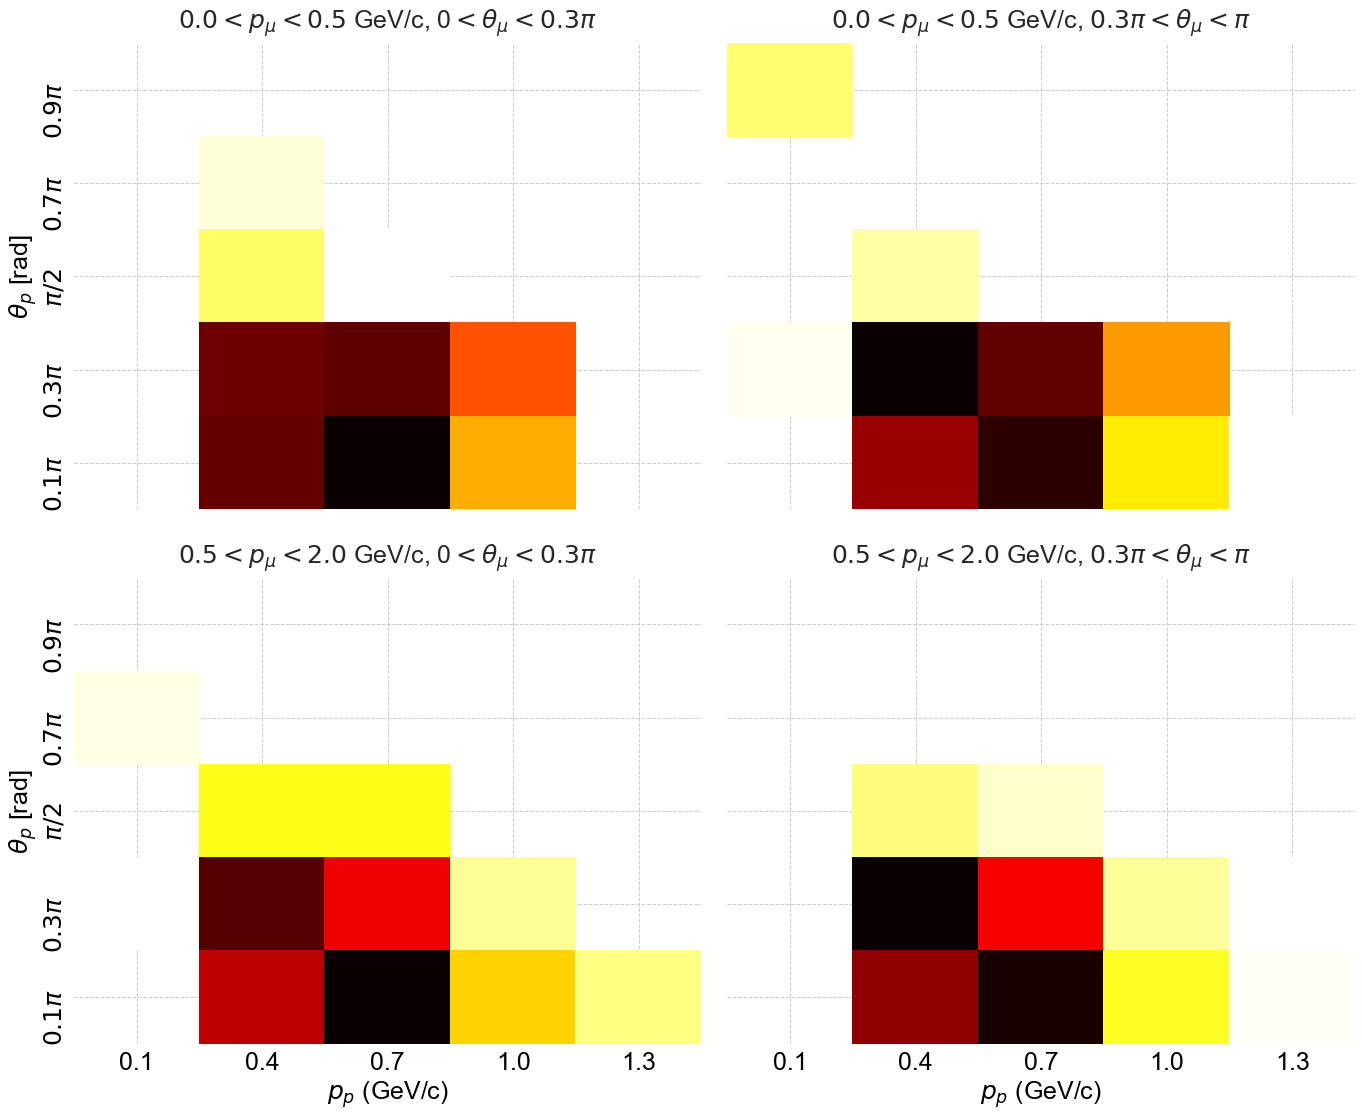

In [29]:
fig = plt.figure(figsize=(19.416,16))
sns.set_style('white')
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_theta,(Pmu_theta_min,Pmu_theta_max) in enumerate(zip(large_bins_Pmu_theta_min,large_bins_Pmu_theta_max)):
        ax = fig.add_subplot(2,2,2*iPmu+iPmu_theta+1)
        histo = h_p_acc['iPmu %d iPmu_theta %d'%(iPmu,iPmu_theta)]
        histo[histo <= 0] = None
        sns.heatmap(1000.*histo,annot=False,cmap='hot_r',fmt=".1f",vmin=None
            ,xticklabels=["%.1f"%tick for tick in Pp_xcenters]
            ,yticklabels=[theta_rad_label(tick) for tick in Pp_theta_ycenters]
            ,cbar=False)
        set_axes(ax,do_add_grid=True,alpha_grid=1
                 ,x_label='' if iPmu==0 else  r'$p_p$ (GeV/c)'
                 ,remove_ticks_x=True if iPmu==0 else False
                 ,y_label=''  if iPmu_theta==1 or iPmu_theta==3 else  r'$\theta_p$ [rad]'
                 ,remove_ticks_y=True if iPmu_theta==1 or iPmu_theta==3 else False
                 ,title=r'$%.1f<p_\mu<%.1f$ GeV/c, %s$<\theta_\mu<$%s'%(Pmu_min,Pmu_max,theta_rad_label(Pmu_theta_min),theta_rad_label(Pmu_theta_max))
                 )
        ax.invert_yaxis()
plt.tight_layout()
save_figure(figures_path+'Pp_acceptance_in_large_Pmu_bins.pdf')